### 📚 구체적인 과제 수행 과정

#### 📖 비지도학습 (unsupervised learning)

- 비지도학습(unsupervised learning)은 머신러닝의 한 유형으로, 데이터에 대한 명확한 레이블(타겟변수) 없이 데이터의 구조와 패턴을 학습하는 방식이다. 비지도 학습은 데이터를 분류하거나 예측하기보다는, 데이터를 이해하고 숨겨진 구조를 발견하는 데 중점을 둔다.

#### 비지도학습의 주요개념

- 입력데이터(X): 비지도학습에서는 입력 데이터만 사용하고, 타겟변수(레이블)는 존재하지 않는다. (예 : 고객 구매 기록, 이미지 데이터 등)
- 목표: 데이터의 숨겨진 구조나 패턴을 발견하고, 데이터의 특성을 이해하는 것. 
  
#### 비지도학습의 주요 유형

- 군집화 (Clustering): 유사한 데이터 포인트들을 그룹으로 묶는 작업이다.
    - 대표 알고리즘:
    - K-평균 군집화 (K-Means Clustering): 데이터 포인트를 K개의 군집으로 나눈다.
    - 계층적 군집화 (Hierarchical Clustering): 데이터 포인트를 계층 구조로 군집화한다.
    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise): 밀도 기반 군집화 알고리즘으로, 밀도가 높은 영역을 군집으로 식별한다.
    - 응용: 고객 세그먼테이션, 이미지 분할

- 차원 축소 (Dimensionality Reduction): 고차원 데이터를 저차원으로 변환하는 작업이다.
    - 대표 알고리즘:
    - 주성분 분석 (PCA, Principal Component Analysis): 데이터의 분산을 최대화하는 주성분을 찾는다.
    - t-SNE (t-Distributed Stochastic Neighbor Embedding): 고차원 데이터를 저차원으로 시각화하는 데 사용된다.
    - 응용: 데이터 시각화, 노이즈 제거

- 연관 규칙 학습 (Association Rule Learning): 데이터 항목 간의 연관성을 발견하는 작업이다.
    - 응용: 장바구니 분석, 추천 시스템


!! 한번 더 정리
- K-평균 군집화(K-Means Clustering): 중심 기반 방법으로, 각 군집의 중심(centroid)을 최적화하여 데이터 포인트를 군집화한다.

- 계층적 군집화(Hierarchical Clustering): 데이터 포인트들을 단계별로 병합하거나 분할하여 계층 구조를 만든다.

- DBSCAN: 밀도 기반 방법으로, 밀도가 높은 영역을 군집으로 간주하고, 밀도가 낮은 영역은 노이즈로 처리한다.

- Gaussian Mixture Model(GMM): 각 군집을 정규 분포로 가정하는 방법이다.

#### 1️⃣ 데이터셋 탐색

- pandas 라이브러리의 read 함수 사용하여 데이터 파일을 데이터프레임으로 불러오기

In [211]:
import pandas as pd

# 데이터 로드
# csv 파일 불러오기 
df = pd.read_csv('./data/Mall_Customers.csv')

# 데이터 확인
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [212]:
print('Mall_Customers.csv 데이터 탐색')
print('-'*100)

# 데이터프레임의 정보 확인 (컬럼, 결측값, 데이터 타입 등)
df.info()
print('-'*100)

print(f'컬럼 : {list(df.columns)}')
print('-'*100)

print(f'데이터프레임의 크기 (행,열) : {df.shape}')
print('-'*100)

# 데이터프레임의 요약 통계량 확인
df.describe() 

Mall_Customers.csv 데이터 탐색
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
----------------------------------------------------------------------------------------------------
컬럼 : ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
----------------------------------------------------------------------------------------------------
데이터프레임의 크기 (행,열) : (200, 5)
----------------------------------------

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 💡 Mall_Customers.csv 파일을 데이터프레임으로 만든 후 여러 메서드를 사용해 탐색한 결과

1. 200행, 5열의 데이터프레임이다.
2. 총 5개의 컬럼이 존재한다. ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
3. range index(연속 정수형 인덱스)가 총 200개, 즉, 0부터 199인덱스까지 있음을 알 수 있다.
4. 모든 컬럼에 결측값이 존재하지 않는다.
5. 'Gender' 컬럼의 데이터만 object 타입, 나머지 컬럼은 모두 정수형 데이터를 가진다.

#### 2️⃣ 데이터셋 전처리 (결측치 처리, 이상치 탐지 및 제거, 특징 선택)

❗️전처리를 하려고 봤는데.. 음 일단 결측값은 없고, 데이터의 크기가 크지 않아서 무슨 값을 가지는 컬럼인지 확인하고 눈에 띄는 값이 있나 확인했는데 딱히 이상치라고 할 만한 것이 안 보인다..
그래서 일단 이상치 처리는 건너뛰고 나중에 돌아와서 IQR 방법을 써준다음 모델의 성능이 더 좋아지는 지 확인하겠다.

#### 📝 스케일링

데이터의 스케일링은 각 특징 (**숫자형 데이터**)의 값을 일정한 범위로 조정하여 모델의 성능을 향상시키고, 수렴 속도를 빠르게 한다.

많은 머신러닝 알고리즘은 데이터의 스케일에 민감하다. 스케일이 다른 특징이 모델 성능에 부정적인 영향을 미칠 수 있다. 특징 간의 값 범위가 큰 차이가 나면 가중치 계산에 영향을 미칠 수 있다. 이를 방지하기 위해 각 특징의 값을 유사한 범위로 조정하는 것이다.

따라서 스케일링은 머신러닝 모델의 성능과 수렴 속도를 개선하기 위해 중요한 단계이다. 

특히 다양한 스케일을 가진 데이터를 다룰 때 유용하다. 스케일링의 주요 목표는 특징 간의 불균형을 줄이고 데이터의 분포를 일정하게 만드는 것이다. 

✅ 스케일링 기법에는 표준화(Standardization)와 정규화(Normalization)가 있다. 

이들은 데이터의 평균, 표준편차, 최대최소값 등을 이용해 데이터를 변환하기 때문에 카테고리형(범주형) 데이터에는 이 방법들을 적용할 수 없고, 숫자형 데이터에만 적용 가능하다. (범주형 데이터는 인코딩과 같은 방식으로 숫자형 데이터로 변환해야 한다.)

**표준화(Standardization)**
- 데이터의 평균을 0, 표준편차를 1로 조정하여 정규 분포를 따르도록 변환한다.
- 적용상황
    - 데이터가 정규분포를 따르거나 정규분포로 가정되는 경우
    - 각 특징의 값 범위가 크게 다를 때
    - 회귀 분석, SVM, K-평균 군집화 등 **거리 기반 알고리즘**에 사용

**정규화(Normalization)** 
- 데이터의 범위를 0과 1사이로 조정한다.
- 적용상황
    - 데이터의 분포가 정규분포를 따르지 않는 겨우
    - 각 특징의 값 범위가 일정한 경우
    - **신경망**, KNN 등 특징의 값 범위가 중요할 때 
  
표준화와 정규화를 사용하여 정수형 컬럼의 데이터를 스케일링 해주자. 

해당 과제에서 K-평균 군집화, 계층적 군집화, DBSCAN 모델을 사용할 건데 이들이 모두 거리 기반 알고리즘이므로 표준화를 사용하여 스케일링 해주겠다. 

❗️ CustomerID 컬럼은 각 고객을 구분하기 위한 고유 식별자이기 때문에, 군집화 과정에 사용할 특징에서 빼줘야 한다.

식별자 컬럼은 고유 값을 가지고 있어 데이터 포인트 간의 실제 유사성이나 특징을 반영하지 않기 때문에 실제 유사성이 있는 데이터 포인트들이 서로 다른 군집으로 분류되고 반대로 유사성이 없는 데이터 포인트들이 같은 군집으로 분류되는 등의 군집화 결과의 왜곡 가능성이 있다.


In [213]:
from sklearn.preprocessing import StandardScaler

# 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'의 표준화
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# 결과 확인
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061
196,197,Female,0.441365,2.497807,-0.861839
197,198,Male,-0.491602,2.497807,0.923953
198,199,Male,-0.491602,2.917671,-1.250054


✅ 인코딩(encoding)

인코딩은 머신러닝 모델이 범주형(카테고리형) 데이터를 처리할 수 있도록 도와주는 중요한 전처리 단계이다. 

대부분의 머신러닝 알고리즘은 숫자형 데이터를 요구하므로,범주형 데이터를 그대로 입력하면 모델이 이를 인식하고 처리할 수 없다. 또한 알고리즘은 입력된 데이터를 기반으로 수치연산을 수행하여 예측 및 분류를 수행한다. 인코딩을 통해 범주형 데이터의 고유한 특성을 수치형 데이터로 표현해야 알고리즘이 데이터의 특징 간의 관계를 학습할 수 있다.

따라서 범주형 데이터를 수치 데이터로 변환해야 한다.

#### 주요 인코딩 방법

- 레이블 인코딩 (Label Encoding) : 각 범주를 순서가 있는 고유한 숫자로 매핑한다.
    - 예: "남성" -> 0, "여성" -> 1
    - 범주형 데이터에 순서가 있을 때 적합하다. 순서가 없는 데이터에 사용하면, 모델이 이 값을 크기로 인식해 잘못된 결과를 초래할 수 있다.

- 원-핫 인코딩 (One-Hot Encoding): 각 범주를 이진 벡터로 변환한다. 각 범주에 대해 별도의 열을 생성하고, 해당 범주에 속하는 데이터는 1, 나머지는 0으로 표시된다.
    - 예: "남성" -> [1, 0], "여성" -> [0, 1]
    - 범주형 데이터에 순서가 없을 때 적합하다. 모델이 범주 간의 순서나 관계를 인식하지 않고 각 범주르 독립적으로 처리할 수 있다.

- 차원 축소 인코딩 : 범주형 데이터가 많을 때 유용하다. 각 범주를 데이터셋 내에서의 출현 빈도로 인코딩한다.
  
- 순서형 인코딩 : 순서가 있는 범주형 데이터를 그 순서에 따라 숫자로 변환하는 방식이다. (예: 만족도(낮음, 중간, 높음) 등)


Gender 컬럼의 경우 범주형 데이터이고, 순서가 없기 때문에 원-핫 인코딩을 적용하겠다. (원-핫 인코딩은 범주형 데이터의 순서나 크기 정보를 반영하지 않는다.)

남성과 여성을 별도의 열로 분리하여 모델이 이를 올바르게 이해할 수 있게 한다.

* 원-핫 인코딩된 범주형 데이터와 표준화된 연속형 데이터는 서로 다른 의미를 가지기 때문에, 수치적으로 다른 범위를 가져도 괜찮다.

In [214]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Gender 컬럼 원-핫 인코딩

# OneHotEncoder 객체를 생성하여 ohe에 저장
ohe = OneHotEncoder()

# fit_transform 메서드는 인코더를 학습시키고, 변환된 결과를 반환한다. toarray() 메서드를 사용하여 결과를 배열 형태로 변환한다.
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()

# 인코딩 결과를 데이터프레임으로 변환
                                                  # 인코딩된 컬럼 이름을 반환
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# 원본 데이터프레임에 인코딩된 데이터프레임을 병합하고, 원본데이터에서 필요없는 CustomerID,Gender 컬럼을 삭제한다.
df = pd.concat([df, gender_df], axis=1).drop(columns=['CustomerID','Gender'])

# 이제 df는 원-핫 인코딩된 Gender 컬럼을 포함한다.

# 결과 확인 (이제 df는 모델학습을 위한 전처리를 마친 데이터프레임이 되었다. 이 과제에서는 모델의 입력 데이터가 df인 것이다.)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1.0,0.0
196,0.441365,2.497807,-0.861839,1.0,0.0
197,-0.491602,2.497807,0.923953,0.0,1.0
198,-0.491602,2.917671,-1.250054,0.0,1.0


이제 데이터셋의 전처리가 끝났으니 모델을 만들어보자! (K-평균 군집화, 계층적 군집화, DBSCAN 모델)

#### 🤖 **k-means clustering (k-평균 군집화)** : 데이터 포인트들을 k개의 군집으로 나누는 것

#### ☑️ **알고리즘의 단계**

1. **초기화**: k개의 군집 중심을 랜덤하게 설정한다.
2. **할당 단계**: 각 데이터 포인트를 가장 가까운 군집 중심에 할당한다.
3. **업데이트 단계**: 각 군집의 중심을 해당 군집에 속한 데이터 포인트들의 평균으로 업데이트한다.
4. **반복**: 할당 단계와 업데이트 단계를 군집 중심이 더 이상 변화하지 않을 때까지 반복한다.

#### ☑️ **거리 측정 방법**

- k-means 알고리즘은 주로 유클리드 거리(Euclidean Distance)를 사용하여 데이터 포인트와 군집 중심 간의 거리를 계산한다.

#### ☑️ **엘보우 방법**

- 최적의 k를 선택하는 데 사용된다.
- k를 증가시키면서 각 k에 대한 군집의 응집도(또는 관성, Inertia)를 계산하고, 이를 그래프로 나타내어 그래프에서 응집도가 급격히 감소하는 지점을 찾는다.


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

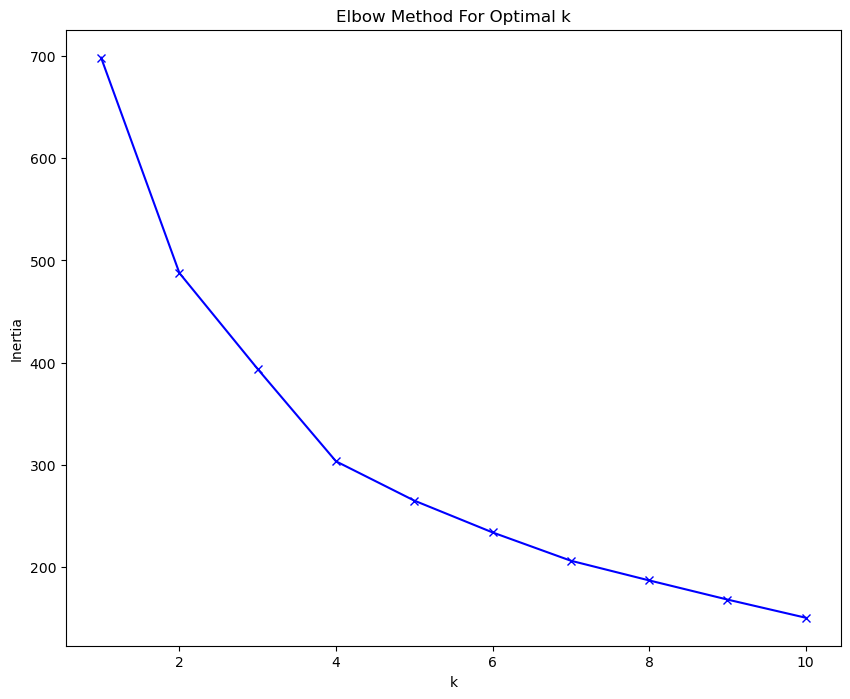

In [215]:
# KMeans 클래스는 K-평균 군집화 알고리즘을 구현하는 데 사용된다. 이 클래스는 데이터 포인트를 k개의 군집으로 나누고, 각 군집의 중심(센트로이드)을 찾는다.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 최적의 k 찾기 (엘보우 방법을 사용하여 군집 수 k의 최적값을 찾는 과정)

# 군집의 관성(inertia)을 저장할 빈 리스트
# 관성: 각 군집의 중심과 해당 군집 내 데이터 포인트들 간의 거리 합을 나타냄
inertia = []

# 범위 내에서 최적의 k를 찾기 위해 여러 값을 시도함
K = range(1, 11)
for k in K:           # 군집 수
    kmeans = KMeans(n_clusters=k, random_state=42)
    # df를 사용하여 모델 학습 시키기
    kmeans.fit(df)
    # 각 k값에 대한 관성을 계산하여 리스트에 추가
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기

# 그래프의 크기 설정
plt.figure(figsize=(10, 8))

# k값에 따른 관성을 플롯. 파란색 x마커와 선을 사용하여 그래프를 그림
plt.plot(K, inertia, 'bx-')

# x축 레이블 설정
plt.xlabel('k')
# y축 레이블 설정
plt.ylabel('Inertia')
# 그래프 제목 설정
plt.title('Elbow Method For Optimal k')

# 그래프 화면에 출력
plt.show()


엘보우 방법을 사용하여 최적의 k 값을 찾는 것은 관성의 급격한 감소가 완화되는 "팔꿈치" 지점을 찾는 것이다.

그래프에서 관성이 급격히 감소하다가 완만해지는 지점이 "팔꿈치"처럼 보인다.

이 지점이 최적의 k 값을 나타낸다.

예를 들어, 그래프에서 k=5 근처에서 팔꿈치가 보인다면, k=5가 최적의 군집 수이다.

예시 해석
- K = range(1, 11): k 값을 1부터 10까지 설정하여 최적의 군집 수를 찾는다.
- inertia: 각 k 값에 따른 관성을 계산하여 리스트에 저장한다.
- 엘보우 그래프를 통해 최적의 k 값을 시각적으로 찾는다. 예를 들어, 그래프에서 k=5에서 팔꿈치가 보이면, k=5가 최적의 군집 수이다.

In [216]:
# 엘보우 그래프를 확인하여 최적의 k값(군집 수)을 5로 결정하고 모델을 학습시킴

# k=5로 모델 생성
# n_clusters=5 : 생성할 군집의 수 5
# n_init 매개변수는 모델을 실행하는 횟수를 설정한다. 여기서 10은 알고리즘을 10번 실행한 후, 가장 좋은 결과(관성이 가장 작은 결과)를 선택한다는 의미이다.
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

# 전처리된 데이터셋 df를 사용하여 k-평균 모델 학습시키기
kmeans.fit(df)

# ⭐️ 모델이 각 데이터 포인트에 할당한 군집 라벨을, df의 새로운 컬럼 Cluster로 추가해줌
# labels_ : 각 데이터 포인트가 속한 군집 레이블(각 데이터 포인트가 속한 군집을 나타내는 숫자 시리즈)을 반환
df['Cluster'] = kmeans.labels_

코드 설명
- 군집라벨: 각 데이터 포인트가 속하는 군집을 나타내는 번호. 
    - 데이터 포인트 : 데이터 프레임의 각 행. 각 데이터 포인트는 여러 특징을 포함하는 하나의 관측값 또는 샘플을 나타낸다. 
- 예를 들어, k-평균 군집화에서 k=5인 경우, 각 데이터 포인트는 0부터 4까지의 숫자 중 하나로 할당된다. 이 숫자는 해당 데이터 포인트가 어느 군집에 속하는지를 나타낸다. (0이라는 라벨은 데이터 포인트가 첫 번째 군집에 속함을 의미한다.)
- 라벨의 값 자체는 중요한 정보가 아니며, 중요한 것은 동일한 라벨을 가진 데이터 포인트들이 유사한 특성을 가진다는 것이다.

💯 다음으로, 실루엣 스코어(Silhouette Score)를 이용하여 군집화의 품질을 평가하자.

실루엣 스코어는 군집화 결과가 얼마나 잘 분리되고 내부적으로 얼마나 일관성이 있는지를 측정한다.

실루엣 스코어는 -1에서 1사이의 값을 가진다.

#### 실루엣 스코어 해석
- +1에 가까울수록: 데이터 포인트가 잘 군집화되어 있고, 군집 내에서 잘 뭉쳐져 있으며, 다른 군집과 명확히 구분되는 것.
- 0에 가까울수록: 데이터 포인트가 두 군집 경계에 위치해 있어 군집화 품질이 낮음을 의미한다.
- -1에 가까울수록: 데이터 포인트가 잘못된 군집에 속해 있음을 나타낸다.
  
➡️ 높은 실루엣 스코어는 군집 간의 분리가 명확하고, 군집 내의 데이터 포인트들이 잘 모여있다는 것을 의미한다. 즉, 높은 스코어를 기록했다면, 군집화가 잘 되었고 각 군집이 명확하게 구분되었음을 나타낸다.

In [217]:
# 실루엣 스코어를 이용한 모델 평가

from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산 
silhouette_avg = silhouette_score(df, kmeans.labels_) 
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4724839598793953


#### 👀 군집 시각화

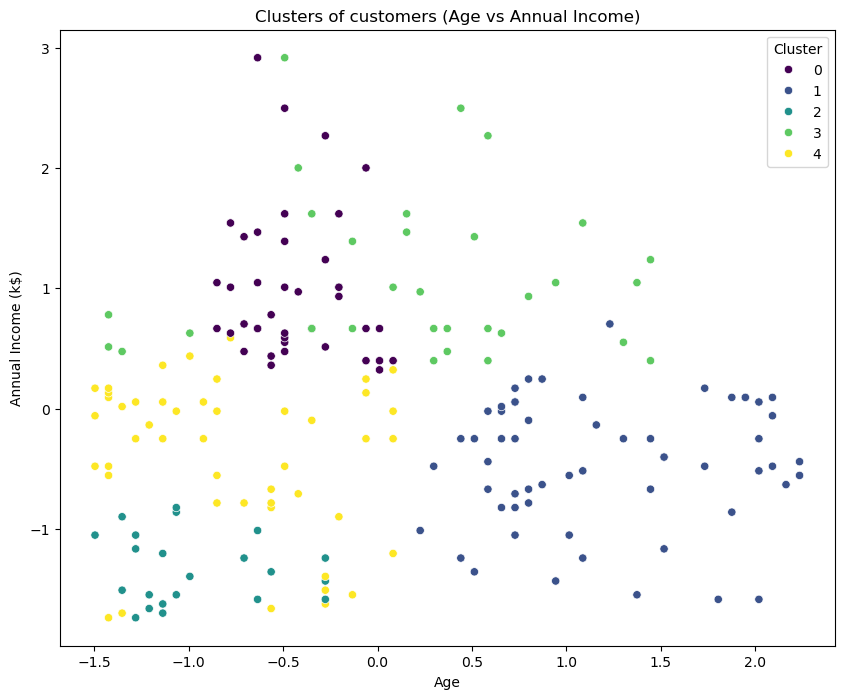

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2차원으로 군집 시각화 (연령 vs 연간소득)
plt.figure(figsize=(10, 8))
# 산점도 (x축=고객나이, y축=고객 연간소득, hue(색상)=서로 다른 군집을 나타냄. 같은 색상의 점들은 동일한 군집에 속한 고객을 나타냄)
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

같은 색상의 고객들은 유사한 나이와 소득을 가진다는 의미이다. 

서로 다른 색상의 고객들은 서로 다른 특성을 가진 그룹을 나타낸다. (지금 5개로 군집화했음)

나이가 평균(38세) 이하이고 연간 소득이 중하위인 4군집과, 나이가 평균 이상이고 연간 소득이 중하위인 1군집에 속하는 고객들이 다른 군집들에 비해 많음을 알 수 있다.

1군집만 많았다면, 그래도 조금 값이 나가는 물품을 파는 쇼핑몰이려나 싶었는데(나이가 있으면 재산은 어느정도 있을테니), 4군집도 많은 걸 보니 그냥 일상용품들을 파는 쇼핑몰일 수도 있겠다는 생각이 든다.


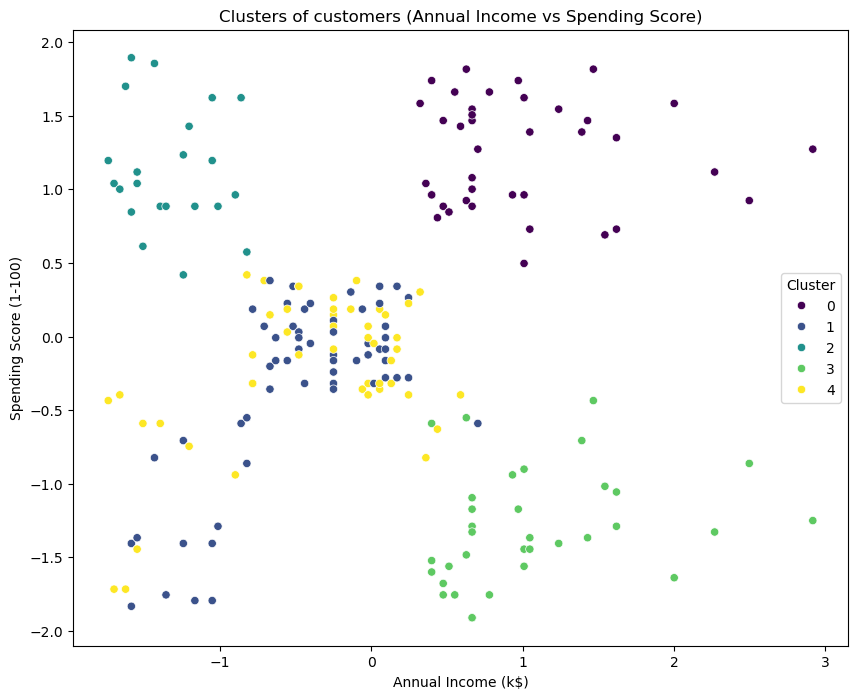

In [219]:
# 2차원으로 군집 시각화 (연간소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
# 산점도
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

소득과 지출점수에 따라 고객들이 어떻게 그룹으로 나뉘어졌는지를 볼 수 있다.
- 같은 색상의 고객들은 유사한 소득과 소비패턴을 가진다.
- 지출점수: 고객이 상품이나 서비스를 구매하는 데 얼마나 많이 소비하는지를 나타내는 지표. 값이 높을수록 해당 고객이 더 많이 지출하는 경향이 있다는 의미. 

위의 표는 다음과 같이 해석할 수 있다.

1. **고소득 - 고지출**: 연간 소득이 높은 고객이 지출 점수도 높은 경우
   - **소득이 높기 때문에 소비 여력이 크고, 따라서 더 많이 지출하는 경향**이 있다.

2. **고소득 - 저지출**: 연간 소득이 높지만 지출 점수가 낮은 고객
   - 소득이 높지만, **소비에 신중하거나 저축을 선호하는 성향**일 수 있다.
  
3. **저소득 - 고지출**: 연간 소득이 낮지만 지출 점수가 높은 고객
  - 소득 대비 소비가 많다는 건데, 특정 상품이나 서비스에 대한 **강한 선호도**가 있을 수 있다.

4. **저소득 - 저지출**: 연간 소득이 낮고 지출 점수도 낮은 고객
  - 소득이 낮아 소비 여력이 적고, 따라서 소비도 적은 경향이 있다.

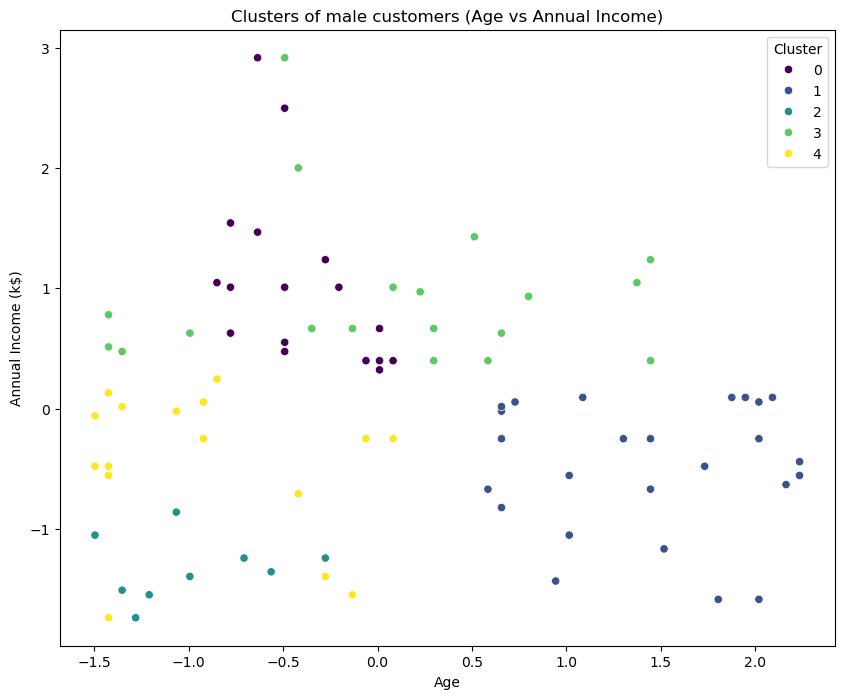

In [220]:
# 남성과 여성 고객들이 나이와 소득에 따라 어떻게 그룹으로 나뉘는지 비교

import seaborn as sns
import matplotlib.pyplot as plt

# 남성

plt.figure(figsize=(10, 8))
# x축=남성고객나이, y축=남성고객 연간소득
sns.scatterplot(x=df[df['Gender_Male'] == 1]['Age'], y=df[df['Gender_Male'] == 1]['Annual Income (k$)'], hue=df[df['Gender_Male'] == 1]['Cluster'], palette='viridis')
plt.title('Clusters of male customers (Age vs Annual Income)')
plt.show()

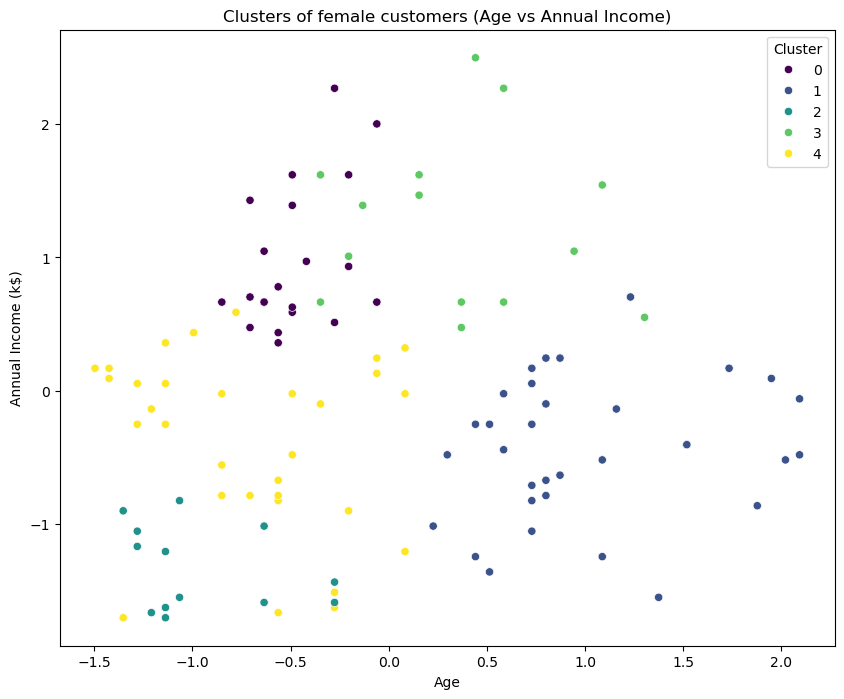

In [221]:
# 여성

plt.figure(figsize=(10, 8))
# # x축=여성고객나이, y축=여성고객 연간소득
sns.scatterplot(x=df[df['Gender_Female'] == 1]['Age'], y=df[df['Gender_Female'] == 1]['Annual Income (k$)'], hue=df[df['Gender_Female'] == 1]['Cluster'], palette='viridis')
plt.title('Clusters of female customers (Age vs Annual Income)')
plt.show()

남자 여자 비교했을 때 모든 군집에서 여성 고객이 더 많다는 것을 눈으로 확인할 수 있다.

연령, 연간소득, 성별 간의 관계를 살펴보기 위해 3차원 그래프를 그려보자

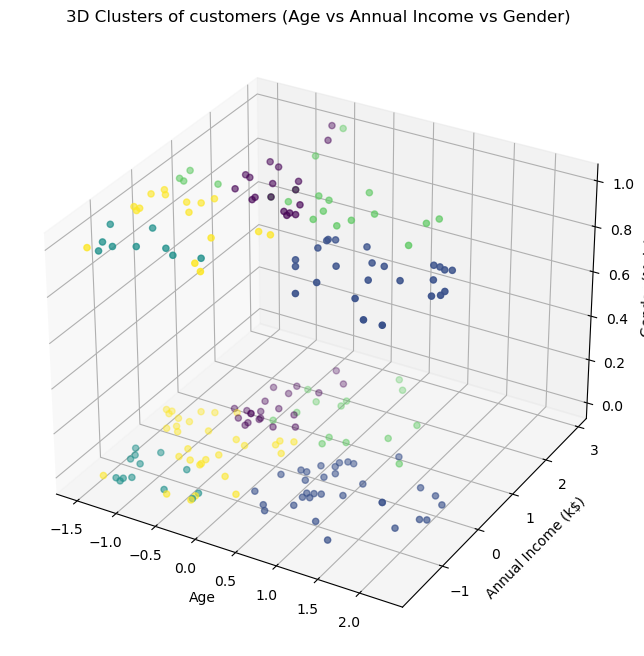

In [222]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt


# 3차원 시각화 (연령 vs 소득 vs 성별)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Gender_Male'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Gender (Male)')
plt.title('3D Clusters of customers (Age vs Annual Income vs Gender)')
plt.show()

세 가지 축(연령, 연간 소득, 성별)에서 데이터 포인트들이 어떻게 분포되어 있는지 분석한다.

각 점은 하나의 고객을 나타내며, 색상은 해당 고객이 속한 군집을 나타낸다.

예를 들어, 특정 군집이 특정 연령대와 소득 수준에서 주로 남성으로 구성되어 있는지 또는 다른 군집이 특정 소득 범위에서 여성으로 구성되어 있는지 등을 확인할 수 있다.

#### 🤖 **계층적 군집화(Hierarchical Clustering)**

비지도학습 중 계층적 군집화(Hierarchical Clustering)는 데이터포인트를 계층 구조로 그룹화하는 방법이다.

데이터 포인트를 점진적으로 병합하거나 분할하여 군집을 형성한다.

#### ☑️ **계층적 군집화의 유형**
1. 병합 군집화: 각 데이터 포인트를 개별 군집으로 시작하여, 가장 가까운 군집을 반복적으로 병합한다.
    - **단순성**: 구현이 비교적 간단하다.
    - **계산 비용**: 데이터 포인트 수가 많아질수록 계산 비용이 증가한다.
    - **덴드로그램**: 군집화 과정을 시각화한 덴드로그램을 생성할 수 있다.

2. 분할 군집화: 모든 데이터 포인트를 하나의 군집으로 시작하여, 반복적으로 가장 멀리 떨어진 군집을 분할한다.
    - **상대적으로 복잡함**: 병합 군집화보다 구현이 상대적으로 복잡할 수 있다.
    - **효율성**: 큰 데이터셋에서 병합 군집화보다 효율적일 수 있다.
    - **덴드로그램**: 군집화 과정을 시각화한 덴드로그램을 생성할 수 있다.

#### ☑️ **계층적 군집화의 작동 원리**

1. **거리 행렬 계산**: 데이터 포인트 간의 거리를 계산하여 거리 행렬을 만든다.
2. **군집 병합/분할**: 거리 행렬을 기반으로 가장 가까운 군집을 병합하거나, 가장 멀리 떨어진 군집을 분할한다.
3. **덴드로그램 생성**: 군집화 과정을 시각화한 덴드로그램을 생성한다.

#### 덴드로그램

덴드로그램은 계층적 군집화 결과를 시각적으로 나타내는 도구이다. 덴드로그램을 통해 데이터가 단계별로 어떻게 군집화되는지 확인할 수 있다.

#### 덴드로그램의 구조
1. 데이터 포인트: 각 데이터 포인트는 덴드로그램의 최하단에 위치한다.
2. 수평선: 데이터 포인트 또는 군집이 결합되는 지점을 나타낸다. 즉, 데이터를 군집화하는 단계에서 결합된 두 군집 간의 거리를 나타낸다. 수평선의 길이는 결합된 군집 간의 거리를 나타내므로, 큰 수평선은 이 결합이 발생한 거리가 멀다는 것을 의미한다.
3. 결합된 군집을 상위 수준의 군집으로 연결한다. 이 선의 높이는 결합된 군집 간의 거리(또는 유사성)를 나타낸다.
   
#### 덴드로그램 해석
- x축(Customers)은 데이터 포인트(고객들)를 나타낸다. 
- y축(Euclidean distances)은 군집간의 거리 또는 유사성을 나타낸다. 높은 값일수록 군집 간의 거리가 멀다는 의미이다.

In [223]:
# 일단 그 전에 k모델의 결과로 df에 추가해놓은 'Cluster' 없애주고 시작하자

df = df.drop(columns=['Cluster'])

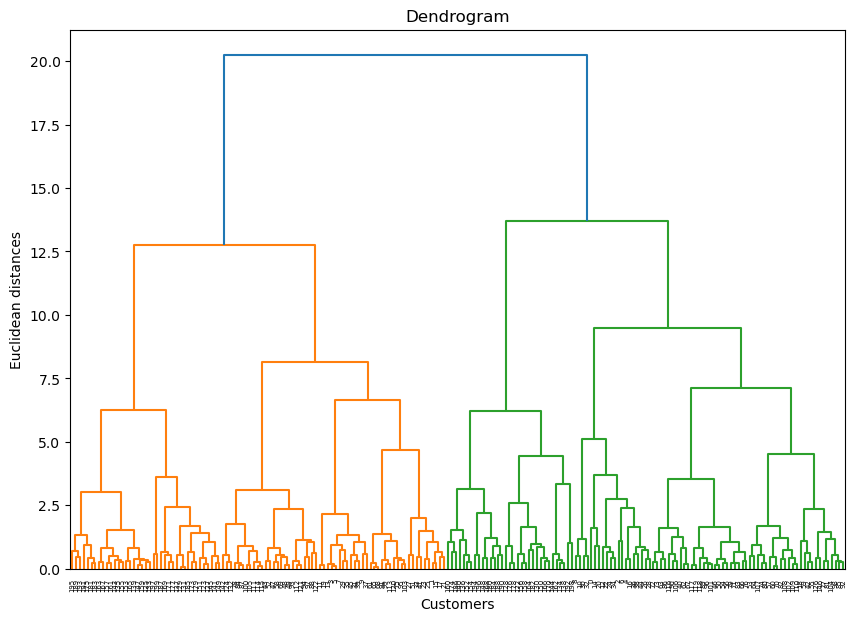

In [224]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

최적의 군집 수 찾기 : 
- 덴드로그램에서 큰 거리를 가지는 수평선을 찾는다.
- 이 큰 수평선이 끊어지는 지점에서 데이터를 나누면 최적의 군집 수를 결정할 수 있다. 
- ⭐️ K-평균 군집화 모델 실습에서 이미 구한 것처럼, 최적의 k는 5이다. 실제로도 최적의 군집 수 k를 5로 설정했을 때 군집화의 품질이 가장 높았음!
- 일반적으로 덴드로그램에서 가장 큰 수평 거리가 있는 지점을 선택하여 군집을 나누면 된다.

#### ☑️ **계층적 군집화 모델 구현**

덴드로그램을 통해 최적의 군집 수를 결정한 후, 계층적 군집화 모델을 구현한다.

In [225]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# 모델 학습
# 여기서 fit_predict 는 각 데이터 포인트가 속하는 군집의 라벨을 포함하는 배열을 반환한다. 이는 각 데이터 포인트가 속하는 군집을 나타내는 비지도 학습의 결과이다.
y_hc = hc.fit_predict(df)

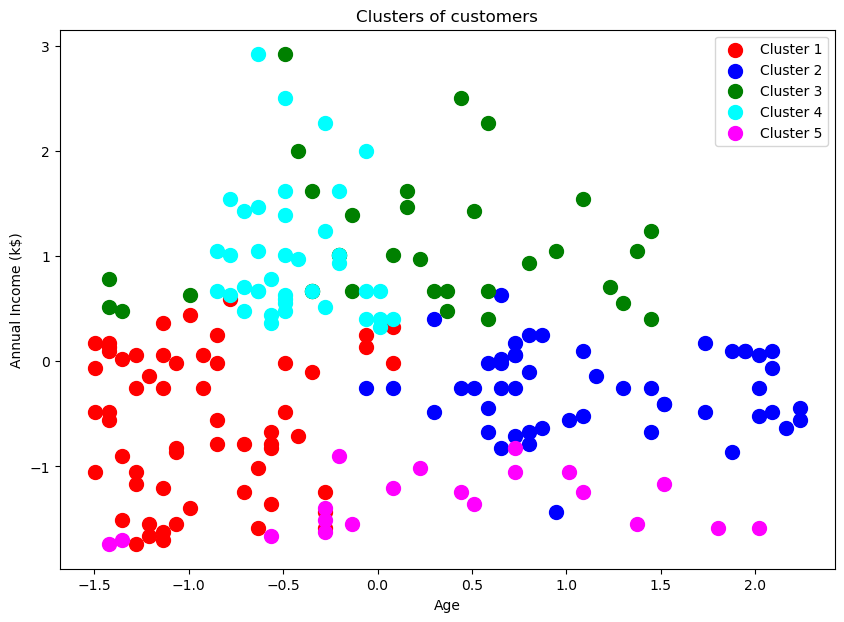

In [226]:
import matplotlib.pyplot as plt

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[y_hc == 0, 0], df.iloc[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df.iloc[y_hc == 1, 0], df.iloc[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df.iloc[y_hc == 2, 0], df.iloc[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df.iloc[y_hc == 3, 0], df.iloc[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df.iloc[y_hc == 4, 0], df.iloc[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


k-평균 군집화 모델로 시각화한 거랑 결과가 동일하게 나왔음을 알 수 있다.

In [227]:
# 실루엣 스코어를 이용한 모델 평가

from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3148237450981173


#### 🤖 **DBSCAN(Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN은 밀도 기반 군집화 알고리즘으로, 데이터 밀도가 높은 영역을 군집으로 간주하고, 밀도가 낮은 영역은 노이즈로 처리한다.
- '노이즈'로 처리한다는 것은 밀도가 낮은 영역의 데이터 포인트들이 군집에 포함되지 않고, 독립적인 노이즈 포인트(군집의 기준에 미치치 못하는 밀도를 가진 포인트)로 분류된다는 것을 의미한다.

#### ☑️ **DBSCAN의 작동 원리**

1. 임의의 데이터 포인트를 선택한다.
2. 선택한 데이터 포인트의 eps 반경 내에 있는 모든 데이터 포인트를 찾는다.
3. eps 반경 내의 데이터수 ≥ min_samples : 해당 데이터 포인트를 중심으로 새로운 군집 형성.
4. eps 반경 내의 데이터수 < min_samples : 해당 데이터 포인트를 노이즈로 간주
5. 군집에 속한 데이터 포인트에 대해 2~4 단계를 반복한다.
6. 모든 데이터 포인트가 처리될 때까지 이 과정을 반복한다.

#### ☑️ **DBSCAN의 주요 파라미터**

- ε (epsilon): 반경을 나타내며, 각 포인트 주위의 밀도를 계산하는 기준
- eps: 두 데이터 포인트가 같은 군집에 속하기 위해 가져야 하는 최대 거리
- min_samples: 한 군집을 형성하기 위해 필요한 최소 데이터 포인트 수

#### ☑️ **DBSCAN의 장점**

- **비구형 군집 탐지**: DBSCAN은 비구형 군집을 탐지할 수 있다.
- **노이즈 처리**: DBSCAN은 노이즈를 효과적으로 처리할 수 있다.
- ⭐️ **군집 수 자동 결정** ⭐️: DBSCAN은 **군집 수를 사전에 지정할 필요가 없다.**


#### ☑️ **DBSCAN 모델 구현**

Scikit-learn의 `DBSCAN`을 사용하여 DBSCAN 군집화를 수행하자.

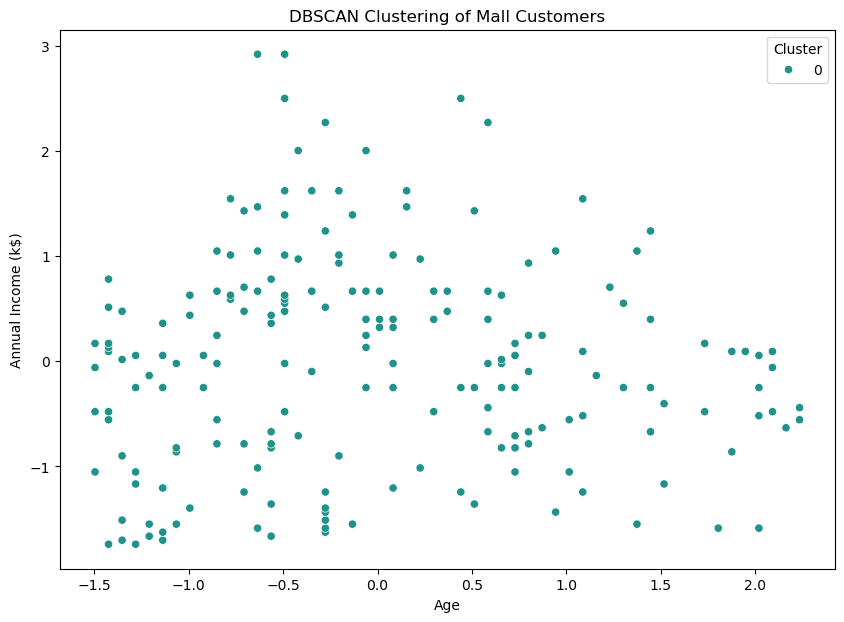

In [241]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=5, min_samples=5)

# 모델 학습 및 예측
df['Cluster'] = dbscan.fit_predict(df)

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

❓❓

🙅🏻‍♂️ 처음에 군집화가 아예 안돼서 몹시 당황..

➡️ eps와 min_samples 파라미터 값이 현재 데이터에 적절하지 않다는 것.

DBSCAN은 밀도 기반 군집화 알고리즘이므로, 지정된 반경(eps) 내에 최소 포인트 수(min_samples)가 충분히 존재하지 않을 경우, 모든 데이터 포인트를 노이즈로 간주할 수 있다❗️

### ⭐️ **파라미터 튜닝** ⭐️

**DBSCAN의 성능은 eps와 min_samples 파라미터에 크게 의존**한다. 적절한 파라미터를 찾기 위해 여러 값을 시도해볼 수 있다.

➡️ eps 값을 늘려서 더 많은 데이터 포인트를 반경 내에 포함시킬 수 있다.
➡️ min_samples 값을 줄여서 코어 포인트가 될 수 있는 데이터 포인트 수를 낮출 수 있다.

✔️ 그리고 이때, 군집화된 개수 자체가 많다고 무조건 좋은 것은 아니다. 중요한 것은 군집의 개수가 데이터의 실제 분포를 잘 반영하고 있는지, 그리고 군집화의 품질이 높은지를 평가하는 것이다.

✔️ 군집화된 결과, 군집 레이블이 -1로 시작할 수도 있는데, -1은 노이즈 포인트(밀도가 낮아, 즉 지정된 반경 esp 내에 최소 포인트 수를 충족하지 못하여 노이즈로 간주된 데이터 포인트)를 나타낸다. 이러한 노이즈 포인트들은 어떤 군집에도 속하지 않으며, -1로 라벨링 된다.

유효한 클러스터를 찾고 최적의 파라미터 값을 찾기 위해 다음과 같은 코드를 작성하여 테스트 했다.

```python
# 다양한 eps와 min_samples 값 시도
eps_values = [1]
min_samples_values = [1,2,3,4,5,6,7,8,9,10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster'] = dbscan.fit_predict(df)
        
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
        plt.title('DBSCAN Clustering of Mall Customers')
        plt.show()
        print(eps, min_samples)
        
        labels = df['Cluster']

        # 유효한 클러스터가 있는지 확인
        unique_labels = set(labels)
        if len(unique_labels) > 1:
            # 실루엣 스코어 계산
            silhouette_avg = silhouette_score(df.drop(columns=['Cluster']), labels)
            print(f'Silhouette Score: {silhouette_avg}')
        else: # 유효한 군집을 발견하지 못해 모든 데이터 포인트가 하나의 군집에 속해있다면(군집라벨의 모든 수가 0이게 되어 set으로 중복 제거했을 때 길이가 1나옴)
            print("유효한 클러스터가 발견되지 않았습니다. 파라미터 값을 조정해 주세요.")
```


테스트 결과 esp의 값이 1일 때를 제외하고는 유효한 클러스터를 발견하지 못했다.. 
그나마 가장 실루엣 스코어가 높은 파라미터 값은 1과 5였다.

eps가 1이고 min_samples가 5일 때 가장 높은 실루엣 스코어를 기록했다면, 이는 해당 파라미터 설정이 데이터의 군집 구조를 가장 잘 반영한다는 것을 의미하기 때문에 이 값을 사용하여 시각화하겠다.

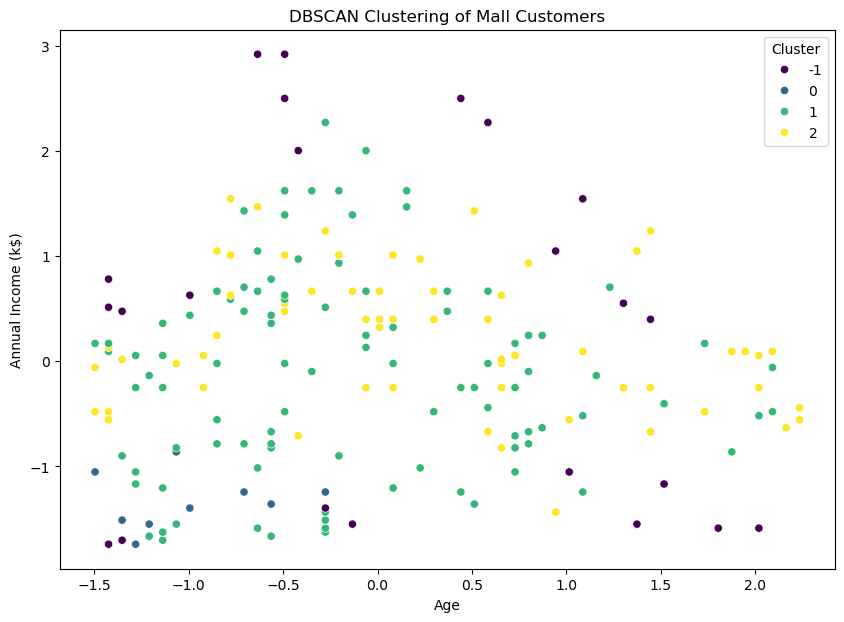

Silhouette Score: 0.11601328296897999


In [254]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=1, min_samples=5)

# 모델 학습 및 예측
df['Cluster'] = dbscan.fit_predict(df)

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()


# 실루엣 스코어 계산
labels = df['Cluster']

silhouette_avg = silhouette_score(df.drop(columns=['Cluster']), labels)
print(f'Silhouette Score: {silhouette_avg}')

#### 🤖 **GMM(Gaussian Mixture Model)**

GMM은 데이터가 여러 개의 가우시안 분포(정규분포)로 이루어져 있다고 가정하여 데이터를 군집화하는 모델이다.

GMM은 데이터의 밀도를 추정하고, 각 데이터 포인트가 어떤 가우시안 분포(또는 군집)에 속하는지 확률을 계산한다.

- 확률 기반: 각 데이터 포인트가 특정 가우시안 분포에 속할 확률을 계산한다.

- 연속적인 분포: 데이터의 연속적인 분포를 잘 설명할 수 있다.

- 클러스터 모양: 타원형이나 다변량 정규 분포를 가지는 클러스터를 잘 찾을 수 있다.

- 라벨링: 각 데이터 포인트가 어떤 클러스터에 속할 확률을 제공한다.


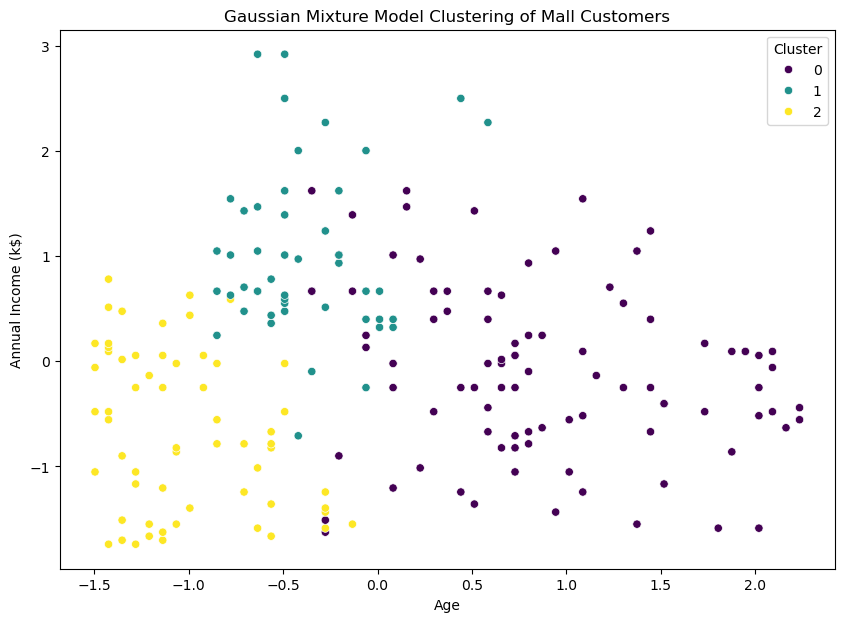

Silhouette Score: 0.3492494156749278


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# GMM 모델 생성
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(df)

# 군집 라벨 예측
labels = gmm.predict(df)

# 결과를 데이터프레임에 추가
df['Cluster'] = labels

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('Gaussian Mixture Model Clustering of Mall Customers')
plt.show()

from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
silhouette_avg = silhouette_score(df, labels)
print(f'Silhouette Score: {silhouette_avg}')


#### **과제수행 결과**

✏️ K-평균 군집화(K-Means Clustering)가 다른 방법들에 비해 가장 군집화의 품질이 좋았다는 것은, 주어진 데이터에 대해 K-평균 모델이 가장 적합한 군집 구조를 잘 찾았다는 의미이다. 

이러한 결과를 바탕으로 몇 가지 중요한 사항을 유추할 수 있다.

##### **데이터의 특성**

- 구형 군집: K-평균 군집화는 군집이 구형에 가까운 경우 특히 잘 작동한다. 데이터가 비교적 단순한 형상을 가지고 있다는 것을 의미할 수 있다.

- 중심 기반 군집: K-평균은 각 군집의 중심을 최적화하여 데이터를 군집화한다. 데이터의 중심과 관련된 패턴이 명확하게 존재한다는 것을 나타낼 수 있다.

##### **다른 모델과의 비교**

- 계층적 군집화: 계층적 군집화는 데이터의 계층 구조를 기반으로 군집화한다. K-평균이 더 좋은 품질을 보였다면, 데이터의 계층 구조가 뚜렷하지 않고 단순한 군집으로 나뉘는 것을 의미할 수 있다.

- DBSCAN: DBSCAN은 밀도 기반 군집화 알고리즘으로, 데이터가 밀도에 기반한 군집이 아니라, 비교적 균일한 분포를 가졌을 가능성이 있다.

- Gaussian Mixture Model (GMM): GMM은 데이터를 여러 개의 가우시안 분포로 모델링한다. K-평균이 더 좋은 성능을 보였다면, 데이터가 단순한 구형 군집으로 잘 나뉘는 것을 의미할 수 있다.

✏️ 2번 과제를 통해 데이터를 모델에 학습시키기 전에 스케일링하고 인코딩하는 방법, 비지도학습을 위한 다양한 머신러닝 모델을 활용하고 결과를 시각화하는 방법에 대해 학습할 수 있었다.